# Lib/Env configuration

In [0]:
# %cd '/content/drive/My Drive/Colab Notebooks/kaggle/'
%cd '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7'

/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7


In [0]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 3.9MB 28.6MB/s 
     |████████████████████████████████| 450kB 38.8MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
!pip install keras==2.3.1

     |████████████████████████████████| 378kB 2.8MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [0]:
!pip install -U efficientnet

In [0]:
import skimage
skimage.__version__

'0.16.2'

In [1]:
# !pip install kaggle==1.5.6
!pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
api_token = {"username":"richardashes","key":"889a8aa244c0efa26372ba7476d82e15"}
import json
import zipfile
import os
with open('/content/drive/My Drive/Colab Notebooks/kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [0]:
root_path = '/content/drive/My Drive/Colab Notebooks/kaggle/'

In [0]:
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload() #this will prompt you to update the json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"richardashes","key":"889a8aa244c0efa26372ba7476d82e15"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [0]:
# !chmod 600 '/content/drive/My Drive/Colab Notebooks/kaggle/kaggle.json'

# with open('root/.kaggle/kaggle.json', 'w') as file:  # has to bein root/.kaggle ?
#     json.dump(api_token, file)
# os.chdir('/content/competitions/jigsaw-toxic-comment-classification-challenge')
# for file in os.listdir():
#     zip_ref = zipfile.ZipFile(file, 'r')
#     zip_ref.extractall()
#     zip_ref.close()


# import os
# os.chdir('gdrive/My Drive/kaggle/cancer')  #change dir
# !mkdir train  #create a directory named train/
# !mkdir test  #create a directory named test/
# !unzip -q train.zip -d train/  #unzip data in train/
# !unzip -q test.zip -d test/  #unzip data in test/
# !unzip sample_submission.csv.zip
# !unzip train_labels.csv.zip

In [0]:
!kaggle --version

Kaggle API 1.5.4


In [0]:
!kaggle config path -p '/content/drive/My Drive/Colab Notebooks/kaggle'

usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')


In [0]:
!kaggle competitions download -c plant-pathology-2020-fgvc7 -p /content/drive/My\ Drive/Colab\ Notebooks/kaggle/plant

In [0]:
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
raw_path = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images'
img_dir = os.path.join(raw_path)
img_files = os.listdir(img_dir)
print('images total:', len(img_files))

images total: 2


In [0]:
train_files = os.listdir('/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/train2')
len(train_files)

1821

In [0]:
train_y = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/train.csv')
test_y = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/test.csv')

In [0]:
# Seperate images in train and test for trainning

# train dir here is actually both for trainning and validation data
# use Imagedatagenerator for this dir with validation_split/subset for validation

train_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/train'
test_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/test'
if not os.path.exists(train_dir):
  os.makedirs(train_dir)
if not os.path.exists(test_dir):
  os.makedirs(test_dir)


for img_name in img_files:
  token = img_name.split('_',1)[0]
  cur = os.path.join(raw_path, img_name)

  if token =='Train':
    des = os.path.join(train_dir, img_name)
    shutil.move(cur,des)
  if token =='Test':
    des =os.path.join(test_dir, img_name)
    shutil.move(cur,des)




In [0]:
train_y.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [0]:
train_y.columns

Index(['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')

In [0]:
train_y.iloc[:,0][0]
#['image_id'][0]
#train_y.columns[0]
tok =train_y[ train_y['image_id']== 'Train_2'] #.columns
print('find',tok['healthy'].values==1)

find [ True]


In [0]:
tok.columns

Index(['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')

In [0]:
for i,col in enumerate(train_y.columns[1:]):
  print(i,col)

0 healthy
1 multiple_diseases
2 rust
3 scab


In [0]:
train_y[train_y.values==1] #== train_y

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [0]:
train_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/train/'
'rs'+train_dir+train_y.columns[1]

'rs/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/train/healthy'

In [0]:
aa=range(4)
type(aa)

range

In [0]:
# Seperate train images into different labels/folders for ImageDataGenerator

train_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/train2/'
train_files = os.listdir(train_dir)

# col1_path = train_dir+train_y.columns[1]
# col2_path = train_dir+train_y.columns[2]
# col3_path = train_dir+train_y.columns[3]
# col4_path = train_dir+train_y.columns[4]

#col_paths = [col1_path,col2_path,col3_path,col4_path]
col_paths = [train_dir + train_y.columns[i] for i in range(1,5)]

for path in col_paths:
  if not os.path.exists(path):
    os.makedirs(path)


for img_name in train_files:
  token = train_y[train_y['image_id']== img_name.split('.')[0] ] # find the image row in train_y table
  cur = os.path.join(train_dir, img_name)
  for i,col in enumerate(train_y.columns[1:]):
    if token[col].values ==1:
      des = os.path.join(col_paths[i], img_name) # hard to define this des path
      shutil.move(cur,des)



(1365, 2048, 3)


<function matplotlib.pyplot.show>

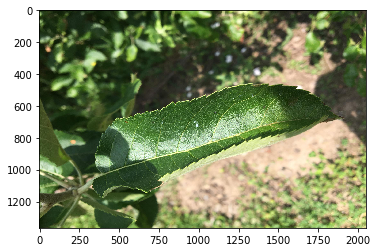

In [0]:
from PIL import Image
eg = Image.open(os.path.join(col1_path, os.listdir(col1_path)[1]) )
egarray = np.array(eg)
print(egarray.shape)
plt.imshow(egarray)
plt.show

In [0]:
import tensorflow as tf
import keras
print(tf.__version__)

2.1.0


Using TensorFlow backend.


In [0]:
from keras.applications.densenet import DenseNet121
from keras.models import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, MaxPool2D, Flatten, Dropout,GlobalAveragePooling2D
from keras.losses import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [0]:
batch_size = 32
num_epoch = 20
train_data_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/train/'

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set the validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(512, 512),
    batch_size=batch_size,
    shuffle=True, seed=13,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(512, 512),
    batch_size=batch_size,
    shuffle=True, seed=13,
    class_mode='categorical',
    subset='validation') # set as validation data



Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [0]:
pre_trained_model = DenseNet121(input_shape = (512, 512,3),weights='imagenet', include_top=False)

#pre_trained_model.summary()
for layer in pre_trained_model.layers[:-10]:
  layer.trainable = False



pre_trained_model2 = DenseNet121(input_shape = (512, 512,3),weights='imagenet', include_top=False)
# for layer in pre_trained_model.layers[:-10]:
#   layer.trainable = False

29089792/29084464 [==============================] - 4s 0us/step


In [0]:

model = Sequential([
                    pre_trained_model,  # 
                    GlobalAveragePooling2D(),
                    Dense(4, activation='softmax')
                    ])
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 16, 16, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4100      
Total params: 7,041,604
Trainable params: 6,957,956
Non-trainable params: 83,648
_________________________________________________________________


In [0]:
for i,layer in enumerate(model.layers[:-1]):
  print(i)
  #layer.trainable = False

0
1


In [0]:
import math

math.ceil( 5.4//2 )


2

In [0]:
len(train_generator)

23

In [0]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch = len(train_generator),
          validation_data = validation_generator, 
          validation_steps = len(validation_generator),
          epochs = num_epoch )

Epoch 1/20
46/46 [==============================] - 939s 20s/step - loss: 0.8524 - accuracy: 0.6948 - val_loss: 0.7777 - val_accuracy: 0.6364
Epoch 2/20
46/46 [==============================] - 154s 3s/step - loss: 0.5130 - accuracy: 0.8464 - val_loss: 1.1900 - val_accuracy: 0.5482
Epoch 3/20
46/46 [==============================] - 156s 3s/step - loss: 0.3777 - accuracy: 0.8957 - val_loss: 1.1386 - val_accuracy: 0.5950
Epoch 4/20
46/46 [==============================] - 156s 3s/step - loss: 0.3008 - accuracy: 0.9225 - val_loss: 4.3427 - val_accuracy: 0.3223
Epoch 5/20
46/46 [==============================] - 157s 3s/step - loss: 0.2642 - accuracy: 0.9246 - val_loss: 1.9977 - val_accuracy: 0.5730
Epoch 6/20
46/46 [==============================] - 157s 3s/step - loss: 0.2117 - accuracy: 0.9444 - val_loss: 1.8350 - val_accuracy: 0.5923
Epoch 7/20
46/46 [==============================] - 156s 3s/step - loss: 0.1719 - accuracy: 0.9602 - val_loss: 0.9238 - val_accuracy: 0.6116
Epoch 8/20
4

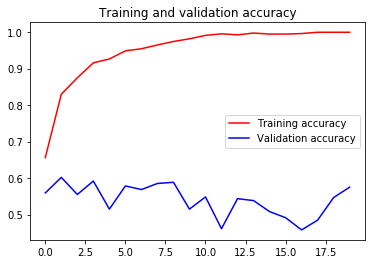

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'w'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
np.round(2.2)

2.0

# Training&Validating in seperate folders

In [0]:
import tensorflow as tf
import keras
print(tf.__version__, keras.__version__)

1.15.0 2.2.5


Using TensorFlow backend.


In [0]:
from keras.applications.densenet import DenseNet121
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.xception import Xception
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, BatchNormalization, MaxPool2D, Flatten, Dropout,GlobalAveragePooling2D
from keras.losses import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [0]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
batch_size = 16
num_epoch = 5
train_data_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/train/'
vali_data_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/validation/'

train_datagen = ImageDataGenerator(rescale=1./255,
    #rotation_range = 30, 
    #vertical_flip =True,                              
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
    #validation_split=0.2) # no validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(512, 512),  # to preserve the asp ratio ?
    batch_size=batch_size,
    shuffle=True,   # don't use seed any more ? # seed=13,
    class_mode='categorical',)
    #subset='training') # no subset anymore

vali_datagen = ImageDataGenerator(rescale=1./255,
       ) #  

validation_generator = vali_datagen.flow_from_directory(
    vali_data_dir, # different directory as training data
    target_size=(512, 512),
    batch_size=batch_size,
    shuffle=True,   # don't use seed any more ? #seed=13,
    class_mode='categorical',)
    #subset='validation') # no more subset



Found 1565 images belonging to 4 classes.
Found 256 images belonging to 4 classes.


In [0]:
# DenseNet

pre_trained_model = DenseNet121(input_shape = (512, 512,3),weights='imagenet', include_top=False)

#pre_trained_model.summary()
for layer in pre_trained_model.layers:#[:-10]: #.layers[-10:]
  layer.trainable = True


# Another pre model copy, but unfrozen
pre_trained_model2 = DenseNet121(input_shape = (512, 512,3),weights='imagenet', include_top=False)

# for layer in pre_trained_model.layers[:-10]:
#   layer.trainable = False

In [0]:
# ResNet50V2
pre_trained_model = ResNet50V2(input_shape = (512, 512,3),weights='imagenet', include_top=False)

#pre_trained_model.summary()
for layer in pre_trained_model.layers:#[:-10]: #.layers[-10:]
  layer.trainable = False


# Another pre model copy, but unfrozen
pre_trained_model2 = ResNet50V2(input_shape = (512, 512,3),weights='imagenet', include_top=False)

In [0]:
model = Sequential([
                    pre_trained_model,  # 
                    GlobalAveragePooling2D(),
                    Dropout(0.20),
                    Dense(4, activation='softmax')
                    ])
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 16, 16, 2048)      23564800  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 8196      
Total params: 23,572,996
Trainable params: 8,196
Non-trainable params: 23,564,800
_________________________________________________________________


In [0]:
for layer in model.layers: #.layers[-10:]
  layer.trainable = True

In [0]:
model.save_weights("model.h5")

In [0]:
model.load_weights("model.h5")

In [0]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch = len(train_generator),
          validation_data = validation_generator, 
          validation_steps = len(validation_generator),
          epochs = 1 )

Epoch 1/1
15/49 [========>.....................] - ETA: 14:10 - loss: 1.2772 - accuracy: 0.3833

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 35 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/49 [==========>...................] - ETA: 12:54 - loss: 1.2522 - accuracy: 0.4030

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 45 could not be retrieved. It could be because a worker has died.
  UserWarning)


49/49 [==============================] - 1201s 25s/step - loss: 1.0448 - accuracy: 0.5661 - val_loss: 1.4096 - val_accuracy: 0.2969


# Step-Expression model

In [0]:
import tensorflow as tf
import keras
import sklearn
print(tf.__version__, keras.__version__)

2.1.0 2.3.1


Using TensorFlow backend.


In [0]:
from keras.applications.densenet import DenseNet121
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.xception import Xception
import efficientnet.keras as efn 
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, BatchNormalization, MaxPool2D, Flatten, Dropout,GlobalAveragePooling2D
from keras.losses import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
tf.test.gpu_device_name()

'/device:GPU:0'

## onetop model

In [0]:
target_size = (300,300)


300

In [0]:
# Seperate folders of train and validation
batch_size = 16
num_epoch = 5
train_data_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/train/'
vali_data_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/validation/'

target_size = (300,300)  # 

train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range = 40, 
    vertical_flip =True,                              
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,)
    #validation_split=0.2) # no validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size= target_size,  # to preserve the asp ratio ?
    batch_size=batch_size,
    shuffle=True,   # don't use seed any more ? # seed=13,
    class_mode='categorical',)
    #subset='training') # no subset anymore

vali_datagen = ImageDataGenerator(rescale=1./255,
       ) #  

validation_generator = vali_datagen.flow_from_directory(
    vali_data_dir, # different directory as training data
    target_size= target_size,
    batch_size=batch_size,
    shuffle=True,   # don't use seed any more ? #seed=13,
    class_mode='categorical',)
    #subset='validation') # no more subset

Found 1565 images belonging to 4 classes.
Found 256 images belonging to 4 classes.


In [0]:
# Same folders of train and validation
batch_size = 16
num_epoch = 5
train_data_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/train2/'
#vali_data_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/validation/'

target_size = (300,300)  # 

train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range = 30, 
    vertical_flip =True,                              
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2) # no validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size= target_size,  # to preserve the asp ratio ?
    batch_size=batch_size,
    shuffle=True, seed=47,  # don't use seed any more ? # seed=13,
    class_mode='categorical',
    subset='training') # no subset anymore

# vali_datagen = ImageDataGenerator(rescale=1./255,
#        ) #  

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # different directory as training data
    target_size= target_size,
    batch_size=batch_size,
    shuffle=True, seed=47,  # don't use seed any more ? #seed=13,
    class_mode='categorical',
    subset='validation') # no more subset

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [0]:
validation_generator.filenames

In [0]:
# Build model with stepped- model funtional API

#basemodel = ResNet50V2(input_shape = (512, 512,3),weights='imagenet', include_top=False)
#basemodel = DenseNet121(input_shape = (target_size[0], target_size[1],3),weights='imagenet', include_top=False)
basemodel = Xception(input_shape = (target_size[0], target_size[1],3),weights='imagenet', include_top=False)

X = basemodel.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.6)(X)
Pred = Dense(4, activation = 'softmax')(X)

model = Model(inputs = basemodel.input, outputs = Pred )

# for layer in basemodel.layers:
#     layer.trainable = False
for layer in basemodel.layers:#[:17]: #17 40
    layer.trainable = True

# To add learining rate to metrics and show in progress bar, or auto-recorded in History?
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr


optimizer = optimizers.Adam(lr =0.0008)
lr_metric = get_lr_metric(optimizer)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy',lr_metric])
model.summary()



83689472/83683744 [==============================] - 6s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________

In [0]:
model.load_weights("model4_Xception0.5_samevali.h5")

In [0]:
# Training with callbacks (of lr_scheduler and lrRead)
import math

def step_decay(epoch):  # this definition use initial_lr
    initial_lr = 0.00005
    drop = 0.9
    epochs_drop = 1.0
    lrate = initial_lr * math.pow(drop, math.floor(epoch/epochs_drop)) #(1+epoch)/epochs_drop)
    return lrate
# def step_decay(epoch,lr):  # this definition use recursive lr, here the lr is the current lr of last epoch
#     drop = 0.7
#     epochs_step = 2.0
#     lrate = lr * drop if epoch>1 and (epoch-1)%epochs_step ==0 else lr # here lr is the current optimizer.lr of last epoch
#     return lrate

# Defince callbacks for lrScheduler  and lrRead
lr_scheduler_callback = keras.callbacks.LearningRateScheduler(step_decay)

class lrRead(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
      pass
      #print('lr callback:',K.eval(self.model.optimizer.lr))
      #self.losses = []

lr_read_callback = lrRead()

history = model.fit_generator(
          train_generator,
          steps_per_epoch = len(train_generator),
          validation_data = validation_generator, 
          validation_steps = len(validation_generator),
          callbacks= [lr_scheduler_callback, lr_read_callback],
          epochs =  10 )

Epoch 1/10
92/92 [==============================] - 202s 2s/step - loss: 0.0098 - accuracy: 0.9973 - lr: 5.0000e-05 - val_loss: 0.1402 - val_accuracy: 0.9642 - val_lr: 5.0000e-05
Epoch 2/10
92/92 [==============================] - 175s 2s/step - loss: 0.0047 - accuracy: 0.9993 - lr: 4.5000e-05 - val_loss: 0.6176 - val_accuracy: 0.9642 - val_lr: 4.5000e-05
Epoch 3/10
92/92 [==============================] - 174s 2s/step - loss: 0.0271 - accuracy: 0.9952 - lr: 4.0500e-05 - val_loss: 0.0054 - val_accuracy: 0.9614 - val_lr: 4.0500e-05
Epoch 4/10
92/92 [==============================] - 175s 2s/step - loss: 0.0150 - accuracy: 0.9952 - lr: 3.6450e-05 - val_loss: 0.0030 - val_accuracy: 0.9587 - val_lr: 3.6450e-05
Epoch 5/10
92/92 [==============================] - 174s 2s/step - loss: 0.0059 - accuracy: 0.9993 - lr: 3.2805e-05 - val_loss: 0.4376 - val_accuracy: 0.9504 - val_lr: 3.2805e-05
Epoch 6/10
92/92 [==============================] - 175s 2s/step - loss: 0.0108 - accuracy: 0.9979 - lr: 

In [0]:
validation_generator.filenames

In [0]:
# model.save_weights("model2_ResNet.h5")

#model.save_weights("model3_DenseNet0.3.h5")
#model.load_weights("model3_DenseNet0.3.h5")
#model.save_weights("model4_Xception0.6_samevali.h5")
model.load_weights("model4_Xception0.6_samevali.h5")

In [0]:
print(type(history.history))
print(history.history.keys())
history.history['lr']

<class 'dict'>
dict_keys(['val_loss', 'val_accuracy', 'val_lr', 'loss', 'accuracy', 'lr'])


[0.00027, 0.000243, 0.0002187, 0.00019683, 0.000177147]

In [0]:
import h5py
filename = 'model2.h5'

with h5py.File(filename, 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])
  

Keys: KeysView(<HDF5 file "model2.h5" (mode r)>)


In [0]:
import h5py
filename = 'model2.h5'

with h5py.File(filename, 'r') as f:
  print(type(f))
  f.visit(print)
  # for key in f.keys():
  #   print(key)

In [0]:
model.save_weights("model2_ResNet.h5")

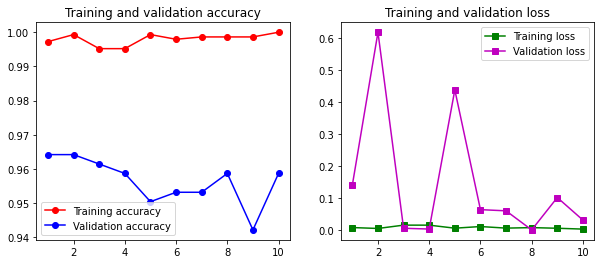

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.facecolor'] = 'w'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

fig,ax = plt.subplots(1,2, figsize =(10,4))
ax[0].plot(epochs, acc, '-or', label='Training accuracy')
ax[0].plot(epochs, val_acc, '-ob', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend(loc=0)

ax[1].plot(epochs, loss, '-sg', label='Training loss')
ax[1].plot(epochs, val_loss, '-sm', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend(loc=0)

plt.show()

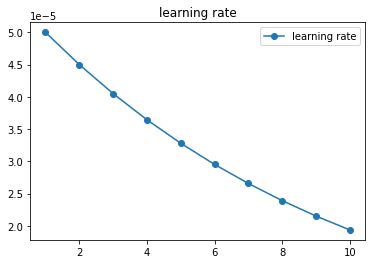

In [0]:
plt.plot(epochs, history.history['lr'], '-o', label='learning rate')

plt.title('learning rate')
plt.legend(loc=0)
#plt.yscale('log')
plt.show()

In [0]:
xx = np.arange(10)
yy = [0.008* math.pow( 0.9, math.floor((1+xi)/2.) ) for xi in xx]
print(yy)

[0.008, 0.007200000000000001, 0.007200000000000001, 0.0064800000000000005, 0.0064800000000000005, 0.005832000000000001, 0.005832000000000001, 0.0052488000000000005, 0.0052488000000000005, 0.00472392]


In [0]:
xx = np.arange(1,10)
# Example of the 'wrong' lr scheduler
def cal_lr(lr0):
  lr = lr0
  yy = [lr]
  for xi in xx:
    lr_cur = lr * math.pow( 0.9, math.floor((1+xi)/2.) )
    lr = lr_cur
    yy.append(lr)
  return yy
yya = cal_lr(0.008)
print(yya)

[0.008, 0.007200000000000001, 0.0064800000000000005, 0.0052488000000000005, 0.004251528000000001, 0.003099363912000001, 0.002259436291848001, 0.0014824161510814736, 0.0009726132367245549, 0.0005743183901534825]


In [0]:
xx = np.arange(1,10)

# Example1 of the right lr scheduler
def cal_lr(lr0):
  lr = lr0
  yy = [lr]
  for xi in xx:
    lr_cur = lr * math.pow( 0.9, math.floor((1+xi)/ 3.) )
    #lr = lr_cur  # do not recurse
    yy.append(lr_cur)
  return yy
yya = cal_lr(0.008)
print(yya)

xx = np.arange(1,10)

# Example2 of the right lr scheduler
def cal_lr(lr0):
  lr = lr0
  yy = [lr]
  for xi in xx:
    lr_cur = lr * 0.9 if (1+xi)%3. ==0 else lr 
    lr = lr_cur  # do not recurse
    yy.append(lr_cur)
  return yy
yya = cal_lr(0.008)
print(yya)


[0.008, 0.008, 0.007200000000000001, 0.007200000000000001, 0.007200000000000001, 0.0064800000000000005, 0.0064800000000000005, 0.0064800000000000005, 0.005832000000000001, 0.005832000000000001]


## twotop model

In [0]:
# Same folder of train and validation

target_size = (200,200)

batch_size = 16
num_epoch = 5
train_data_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/train2/'
#vali_data_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/validation/'


train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range = 30,                               
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode = 'wrap',
    horizontal_flip=True,
    vertical_flip =True,
    validation_split=0.15) # no validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size= target_size,  # to preserve the asp ratio ?
    batch_size=batch_size,
    shuffle=True, seed=47,  # seed actually doesn't change the partition
    class_mode='categorical',
    subset='training') # no subset anymore

# vali_datagen = ImageDataGenerator(rescale=1./255,
#        ) #  

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # different directory as training data
    target_size= target_size,
    batch_size=batch_size,
    shuffle=True, seed=47,  # ,
    class_mode='categorical',
    subset='validation') # no more subset

Found 1550 images belonging to 4 classes.
Found 271 images belonging to 4 classes.


In [0]:
validation_generator.filenames

In [0]:
# Build model with stepped-model funtional API

#basemodel = ResNet50V2(input_shape = (512, 512,3),weights='imagenet', include_top=False)
#basemodel = DenseNet121(input_shape = (target_size[0], target_size[1],3),weights='imagenet', include_top=False)
#basemodel = Xception(input_shape = (target_size[0], target_size[1],3),weights='imagenet', include_top=False)
basemodel = efn.EfficientNetB6(input_shape = (target_size[0], target_size[1],3),weights='imagenet', include_top=False)


X = basemodel.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.5)(X)
X = Dense(128, activation = 'relu')(X)
X = Dropout(0.5)(X)

Pred = Dense(4, activation = 'softmax')(X)

model = Model(inputs = basemodel.input, outputs = Pred )

# for layer in basemodel.layers:
#     layer.trainable = False
for layer in basemodel.layers:#[:17]: #17 40
    layer.trainable = True

# To add learining rate to metrics and show in progress bar, or auto-recorded in History?
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr


optimizer = optimizers.Adam(lr =0.001)
lr_metric = get_lr_metric(optimizer)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy',lr_metric])
model.summary()



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 100, 100, 56) 1512        input_3[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 100, 100, 56) 224         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 100, 100, 56) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [0]:
#model.load_weights("model4_Xception0.5_samevali.h5")

In [0]:
# To calculate class weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                          np.unique(y_train),
                          y_train)

In [0]:
# Define My callback for EarlyStopping

# class Myearlystop(keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs = {}):
#     if logs.get('val_accuracy')>0.96:
#       print('Early stop as val_acc surpasses 0.96')
#       self.model.stop_training = True

class Myearlystop(keras.callbacks.Callback):
  def __init__(self, monitor = 'val_accuracy' , thres =0.96, patience =3):
    self.monitor = monitor
    self.thres = thres
    self.patience = patience
    self.wait = 0   # a internal counter for counting the num of satisfied epochs

  def on_epoch_end(self, epoch, logs = {}):
    if logs.get(self.monitor) <= self.thres:
      self.wait = 0
    if logs.get(self.monitor) > self.thres:
      self.wait += 1

    if self.wait >= self.patience: # Earlystop if val_acc stay above thres for certain epochs
      print('Early stop as val_acc surpasses {}'.format(self.thres) ) 
      self.model.stop_training = True



In [0]:
# Training with callbacks (of lr_scheduler and lrRead)
import math

def step_decay(epoch):  # this definition use initial_lr
    initial_lr = 5e-5 # 0.0005
    drop = 0.8
    epochs_drop = 10.0
    lrate = initial_lr * math.pow(drop, math.floor(epoch/epochs_drop)) #(1+epoch)/epochs_drop)
    return lrate
# def step_decay(epoch,lr):  # this definition use recursive lr, here the lr is the current lr of last epoch
#     drop = 0.7
#     epochs_step = 2.0
#     lrate = lr * drop if epoch>1 and (epoch-1)%epochs_step ==0 else lr # here lr is the current optimizer.lr of last epoch
#     return lrate

# Defince callbacks for lrScheduler  and lrRead
lr_scheduler_callback = keras.callbacks.LearningRateScheduler(step_decay)

class lrRead(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
      pass
      #print('lr callback:',K.eval(self.model.optimizer.lr))
      #self.losses = []

lr_read_callback = lrRead()

# earlystop = keras.callbacks.EarlyStopping(monitor='val_accuracy', baseline = 96.2, min_delta = 1,
#               patience=3, verbose=0, mode='max' )

myearlystop = Myearlystop(monitor = 'val_accuracy', thres =0.963 ,patience =3)

checkpoint = keras.callbacks.ModelCheckpoint('2top_EffiB6_0.5_0.5_cw_B16.h5', monitor='val_accuracy', mode='max', 
                save_best_only=True, save_weights_only = True)

class_weight = {0:1821/520, 1:1821/90, 2: 1821/611, 3: 1821/600} # classes training data imbalance


history = model.fit_generator(
          train_generator,
          steps_per_epoch = len(train_generator),
          validation_data = validation_generator, 
          validation_steps = len(validation_generator),
          callbacks= [lr_scheduler_callback, lr_read_callback, myearlystop, checkpoint],
          class_weight = class_weight,
          epochs =  80 )

# save weights
#model.save_weights("2top_Xception_0.8_0.8.h5")

Epoch 1/80
97/97 [==============================] - 1089s 11s/step - loss: 0.4762 - accuracy: 0.9819 - lr: 5.0000e-05 - val_loss: 0.0049 - val_accuracy: 0.9410 - val_lr: 5.0000e-05
Epoch 2/80
97/97 [==============================] - 107s 1s/step - loss: 0.3085 - accuracy: 0.9845 - lr: 5.0000e-05 - val_loss: 0.0038 - val_accuracy: 0.9631 - val_lr: 5.0000e-05
Epoch 3/80
97/97 [==============================] - 109s 1s/step - loss: 0.2599 - accuracy: 0.9871 - lr: 5.0000e-05 - val_loss: 0.0600 - val_accuracy: 0.9520 - val_lr: 5.0000e-05
Epoch 4/80
97/97 [==============================] - 110s 1s/step - loss: 0.4243 - accuracy: 0.9774 - lr: 5.0000e-05 - val_loss: 8.5914e-04 - val_accuracy: 0.9483 - val_lr: 5.0000e-05
Epoch 5/80
97/97 [==============================] - 110s 1s/step - loss: 0.3147 - accuracy: 0.9813 - lr: 5.0000e-05 - val_loss: 0.0014 - val_accuracy: 0.9557 - val_lr: 5.0000e-05
Epoch 6/80
97/97 [==============================] - 110s 1s/step - loss: 0.2052 - accuracy: 0.9923 

In [0]:
#model.save_weights("2top_EffiB6_0.5_0.5_cw_B16_last.h5")
model.load_weights("2top_EffiB6_0.5_0.5_cw_B16.h5")

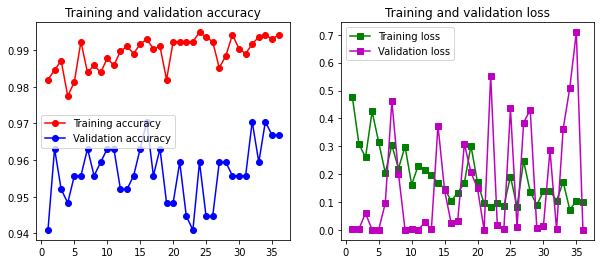

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.facecolor'] = 'w'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

fig,ax = plt.subplots(1,2, figsize =(10,4))
ax[0].plot(epochs, acc, '-or', label='Training accuracy')
ax[0].plot(epochs, val_acc, '-ob', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend(loc=0)

ax[1].plot(epochs, loss, '-sg', label='Training loss')
ax[1].plot(epochs, val_loss, '-sm', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend(loc=0)

plt.show()

In [0]:
history.history['val_accuracy']

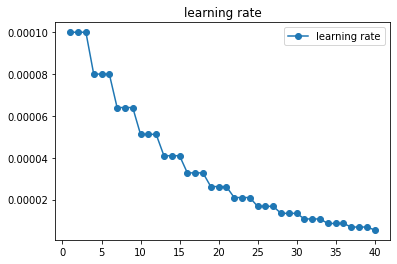

In [0]:
plt.plot(epochs, history.history['lr'], '-o', label='learning rate')

plt.title('learning rate')
plt.legend(loc=0)
#plt.yscale('log')
plt.show()

## prediction

In [0]:
import math
import pandas as pd
import numpy as np
math.ceil(0.1)


1

In [0]:
# there's a subfolder in test, which is for the logic of generator
test_data_dir = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/images/test/'

test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size= target_size,
    batch_size=batch_size,
    shuffle=False,   #  Do not shuffle here
    class_mode='categorical',)


Found 1821 images belonging to 1 classes.


In [0]:
# Predict_generator
pred = model.predict_generator(test_generator, steps = len(test_generator),verbose =1)

114/114 [==============================] - 79s 694ms/step


In [0]:
test_generator.filenames

In [0]:
# train_generator.classes
train_generator.class_indices

{'healthy': 0, 'multiple_diseases': 1, 'rust': 2, 'scab': 3}

In [0]:
# the one hot order follows train_generator.class_indices
#pred =np.round(pred)
pred[:10,:]

array([[8.4279658e-05, 3.4686099e-03, 9.9636227e-01, 8.4759733e-05],
       [6.4877694e-04, 1.1095260e-03, 9.9821788e-01, 2.3753497e-05],
       [1.5336908e-04, 2.6811252e-04, 9.9947196e-01, 1.0651200e-04],
       [7.0424918e-05, 2.7907743e-05, 6.0083403e-07, 9.9990106e-01],
       [1.8615421e-04, 2.7810624e-03, 9.9672455e-01, 3.0821198e-04],
       [2.7923192e-05, 9.7804743e-01, 5.3357926e-05, 2.1871375e-02],
       [3.4861671e-06, 3.1083557e-06, 9.9999321e-01, 2.4905208e-07],
       [4.7706706e-03, 2.7485550e-03, 3.9774022e-04, 9.9208307e-01],
       [5.0435679e-06, 9.8812507e-06, 1.7339959e-08, 9.9998510e-01],
       [9.9999177e-01, 3.0450781e-06, 4.2973084e-06, 8.2315523e-07]],
      dtype=float32)

In [0]:
aa = np.round(np.array([[3.5406939e-14, 2.7376007e-02, 9.7262400e-01, 4.2884424e-14],
       [9.5823172e-09, 2.5655964e-01, 7.4344039e-01, 3.3717131e-09],
       [1.6213093e-06, 2.1586951e-02, 9.7841144e-01, 2.1054239e-08],
       [7.1255120e-12, 8.2220860e-05, 1.6351187e-09, 9.9991775e-01],
       [1.4245249e-07, 3.8874811e-01, 6.1125171e-01, 5.0142678e-08],
       [3.4441595e-07, 4.9525858e-03, 2.8138561e-06, 9.9504423e-01],
       [2.2511544e-16, 4.0016530e-04, 9.9959987e-01, 5.3763100e-17],
       [2.8984293e-06, 3.6579075e-03, 1.4403715e-05, 9.9632484e-01],
       [2.8269773e-07, 1.3657144e-03, 2.1871922e-06, 9.9863178e-01],
       [9.9327809e-01, 1.7123418e-03, 4.2330520e-03, 7.7659375e-04]]))
print(aa)

In [0]:
# note that the order of test files names in generator is different from the CSV 

SUB_PATH = '/content/drive/My Drive/Colab Notebooks/kaggle/plant-pathology-2020-fgvc7/sample_submission.csv'

sub = pd.read_csv(SUB_PATH)
sub.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


In [0]:
subtest = sub.copy()
subtest.sort_values( by =['image_id'])

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
10,Test_10,0.25,0.25,0.25,0.25
100,Test_100,0.25,0.25,0.25,0.25
1000,Test_1000,0.25,0.25,0.25,0.25
...,...,...,...,...,...
995,Test_995,0.25,0.25,0.25,0.25
996,Test_996,0.25,0.25,0.25,0.25
997,Test_997,0.25,0.25,0.25,0.25
998,Test_998,0.25,0.25,0.25,0.25


In [0]:
# names = [ name.split('/',1)[1].split('.',1)[0] for name in test_generator.filenames]
# pred = np.round(pred)
# dict_pred ={ 'image_id': names,
#             'healthy':list(pred[:,0]),
#             'multiple_diseases':list(pred[:,1]),
#             'rust': list(pred[:,2]),
#             'scab': list(pred[:,3])} 

# pred_df = pd.DataFrame(data=dict_pred)
# pred_df.head()
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

pred = lb.fit_transform( np.argmax(pred, axis= 1) )
pred_df = pd.DataFrame(pred, columns = ['healthy','multiple_diseases','rust','scab'])
names = [ name.split('/',1)[1].split('.',1)[0] for name in test_generator.filenames]
pred_df.insert(0, 'image_id', names)
pred_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0,0,1,0
1,Test_1,0,0,1,0
2,Test_10,0,0,1,0
3,Test_100,0,0,0,1
4,Test_1000,0,0,1,0


In [0]:
# sort image_id by natural number order
from natsort import natsorted, index_natsorted, order_by_index

pred_df.reindex( index = order_by_index(pred_df.index, index_natsorted(pred_df['image_id'])) )

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0,0,1,0
1,Test_1,0,0,1,0
933,Test_2,0,0,0,1
1044,Test_3,1,0,0,0
1155,Test_4,0,0,1,0
...,...,...,...,...,...
909,Test_1816,0,0,1,0
910,Test_1817,0,0,0,1
911,Test_1818,0,0,1,0
912,Test_1819,1,0,0,0


In [0]:
# natural sort
pred_df2 = pred_df.reindex( index = order_by_index(pred_df.index, index_natsorted(pred_df['image_id'])) ).copy()
pred_df2.reset_index(inplace = True, drop=True)
pred_df2.head(10)

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0,0,1,0
1,Test_1,0,0,1,0
2,Test_2,0,0,0,1
3,Test_3,1,0,0,0
4,Test_4,0,0,1,0
5,Test_5,1,0,0,0
6,Test_6,1,0,0,0
7,Test_7,0,0,0,1
8,Test_8,0,1,0,0
9,Test_9,0,0,1,0


In [0]:
pred_df2.to_csv('submission_2topEffiNetB6_0.5_0.5_cw_B16_2.csv', index = False) # actually no need to rest the index in upper cell, 